# Estudo para previsão de preços de imóveis

## Importando as bases e conhecendo os dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('data/USA_Housing.csv', sep=',')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Entendendo as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Temos 5000 linhas e 7 colunas, a saber:
- Avg. Area Income - renda média na região do imóvel
- Avg. Area House Age - idade média da casa na região
- Avg. Area Number of Rooms - área média em relação ao número de quartos
- Avg. Area Number of Bedrooms - área média em relação ao número de banheiros
- Area Population - população residente na área
- Price - preço
- Address - endereço

## Análise Exploratória

In [9]:
# Entendendo a estatística por trás de cada variável numérica
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Consideração inicial:
Para a finalidade desse estudo, vamos analisar a renda de modo geral, não fazendo a estratificação por cidade ou estado, o que poderia ser feito tratando a variável "Address", que nos mostra imóveis espalhados por vários estados nos EUA.

Esse tratamento e segmentação poderá ser objeto de uma segunda análise.

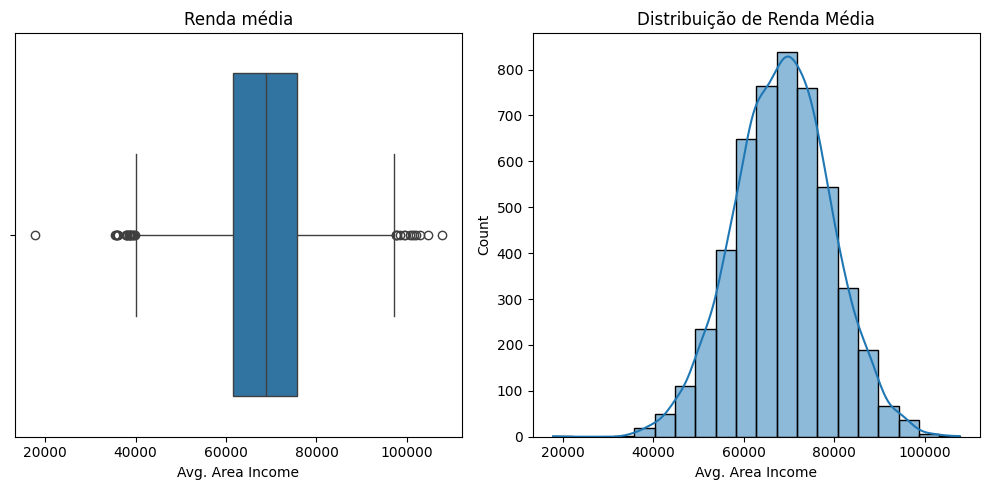

In [ ]:
# Renda média
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Avg. Area Income', data=df)
plt.title('Renda média')


plt.subplot(1, 2, 2)
sns.histplot(df['Avg. Area Income'], bins=20, kde=True)  
plt.title('Distribuição de Renda Média')

# Mostrar a figura com os dois gráficos
plt.tight_layout()
plt.show()

Apesar de haver alguns outliers, como pode ser visto no boxplot, a média e a mediana de valores está bastante parecida (~68583 vs. ~68804).
A distribuição das rendas fica entre o primeiro e o terceiro quartis, ou seja, de ~61480 a ~75783.

In [17]:
# Analisando os outliers
Q1_Income = df['Avg. Area Income'].quantile(0.25)
Q3_Income = df['Avg. Area Income'].quantile(0.75)
IQR_Income = Q3_Income - Q1_Income
print(f'Q1: {Q1_Income}')
print(f'Q3: {Q3_Income}')
print(f'IQR: {IQR_Income}')
print(f'Limite inferior: {Q1_Income - 1.5 * IQR_Income}')
print(f'Limite superior: {Q3_Income + 1.5 * IQR_Income}')

# Extraindo outliers inferiores e superiores
outliers_inferiores = df[df['Avg. Area Income'] < (Q1_Income - 1.5 * IQR_Income)]
outliers_superiores = df[df['Avg. Area Income'] > (Q3_Income + 1.5 * IQR_Income)]
print(f'Outliers inferiores: {len(outliers_inferiores)}')
print(f'Outliers superiores: {len(outliers_superiores)}')


Q1: 61480.562388460974
Q3: 75783.33866615265
IQR: 14302.776277691672
Limite inferior: 40026.39797192346
Limite superior: 97237.50308269015
Outliers inferiores: 19
Outliers superiores: 13


O número de outliers é baixo em relação a toda a base.

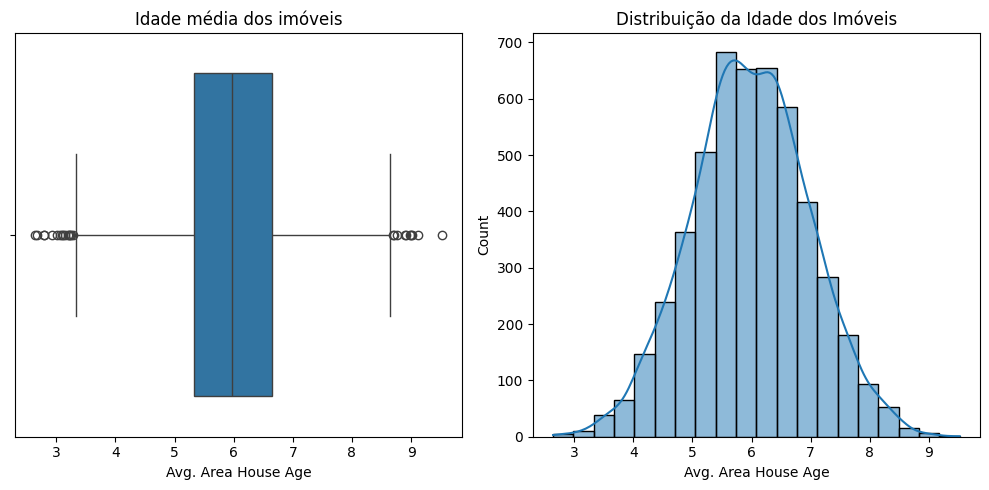

In [22]:
# Média de idade dos imóveis
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Avg. Area House Age', data=df)
plt.title('Idade média dos imóveis')

plt.subplot(1, 2, 2)
sns.histplot(df['Avg. Area House Age'], bins=20, kde=True)  
plt.title('Distribuição da Idade dos Imóveis')

# Mostrar a figura com os dois gráficos
plt.tight_layout()
plt.show()

In [19]:
# Analisando os outliers
Q1_Age = df['Avg. Area House Age'].quantile(0.25)
Q3_Age = df['Avg. Area House Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
print(f'Q1: {Q1_Age}')
print(f'Q3: {Q3_Age}')
print(f'IQR: {IQR_Age}')
print(f'Limite inferior: {Q1_Age - 1.5 * IQR_Age}')
print(f'Limite superior: {Q3_Age + 1.5 * IQR_Age}')

# Extraindo outliers inferiores e superiores
outliers_inferiores = df[df['Avg. Area House Age'] < (Q1_Age - 1.5 * IQR_Age)]
outliers_superiores = df[df['Avg. Area House Age'] > (Q3_Age + 1.5 * IQR_Age)]
print(f'Outliers inferiores: {len(outliers_inferiores)}')
print(f'Outliers superiores: {len(outliers_superiores)}')

Q1: 5.322283015802158
Q3: 6.6508084794160585
IQR: 1.3285254636139001
Limite inferior: 3.329494820381308
Limite superior: 8.643596674836909
Outliers inferiores: 15
Outliers superiores: 10


A idade dos imóveis varia de cerca de 2 a 10 anos, o que denota serem imóveis relativamente novos. Apesar de alguns outliers, a média e mediana não possuem grandes discrepâncias. O número de outliers é baixo em relação a toda a base.